In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist


(train_images, train_labels), (test_images, test_labels)=mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:

#normalize pixel values to be between 0 and 1
train_images=train_images.astype('float32')/255.0
test_images=test_images.astype('float32')/255.0


#reshape the images into the format expected by the neural network
train_images=train_images.reshape((60000,28,28,1))
test_images=test_images.reshape((10000,28,28,1))


#encode the labels using one-hot encoding
from tensorflow.keras.utils import to_categorical
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)


model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
#Compile the model: Specify the loss function, optimizer, and metrics for model compilation
#adm=Adaptive Moment Estimation
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


#Train the Model: Train the model using the training data
model.fit(train_images,train_labels,epochs=10,batch_size=64,validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 50s 65ms/step - accuracy: 0.8523 - loss: 0.4901 - val_accuracy: 0.9789 - val_loss: 0.0706
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 65ms/step - accuracy: 0.9807 - loss: 0.0619 - val_accuracy: 0.9843 - val_loss: 0.0509
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 93s 79ms/step - accuracy: 0.9860 - loss: 0.0449 - val_accuracy: 0.9862 - val_loss: 0.0442
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 79ms/step - accuracy: 0.9905 - loss: 0.0307 - val_accuracy: 0.9864 - val_loss: 0.0467
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 64ms/step - accuracy: 0.9919 - loss: 0.0233 - val_accuracy: 0.9868 - val_loss: 0.0474
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 63ms/step - accuracy: 0.9931 - loss: 0.0219 - val_accuracy: 0.9883 - val_loss: 0.0425
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 49s 65ms/step - accuracy: 0.9944 - loss: 0.0162 - val_accuracy: 0.9884 - val_loss: 0.0417
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 62ms/step - accuracy: 0.9961 - loss: 0.0118 - 

In [3]:

#evaluate the model: evaluate the trained model on the test data
test_loss,test_acc=model.evaluate(test_images,test_labels)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9909 - loss: 0.0369
Test accuracy: 0.992900013923645


In [4]:
predictions=model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
Actual Label: 7, Predicted Label: 7
Actual Label: 2, Predicted Label: 2
Actual Label: 1, Predicted Label: 1
Actual Label: 0, Predicted Label: 0
Actual Label: 4, Predicted Label: 4


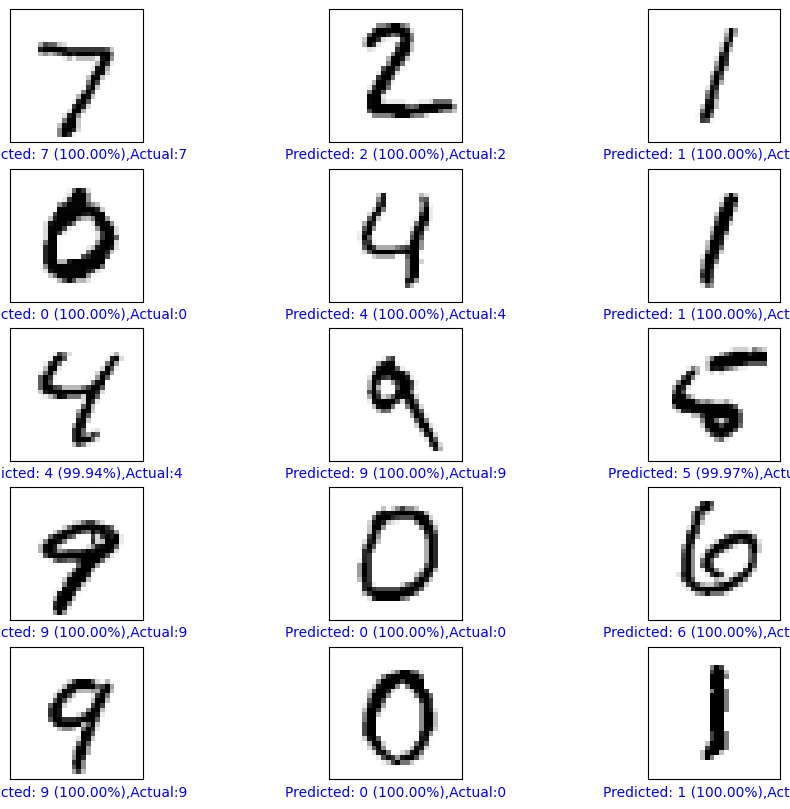

In [5]:
#make predictions on the test set
predictions=model.predict(test_images)

#get the index of the class with the highest peobability for each prediction
predicted_labels=predictions.argmax(axis=1)

#display the first few predictions
for i in range(5):
  print(f"Actual Label: {test_labels[i].argmax()}, Predicted Label: {predicted_labels[i]}")

#optionally, you can visualize the images and their predictions
import matplotlib.pyplot as plt

def plot_images(i,predictions_array,true_label,img):
  predictions_array,true_label,img=predictions_array[i], true_label[i].argmax(),img[i].reshape(28,28)
  plt.grid('FALSE')
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img,cmap=plt.cm.binary)

  predicted_label=predictions_array.argmax()
  color='blue' if predicted_label == true_label else 'red'

  plt.xlabel(f"Predicted: {predicted_label} ({100* tf.reduce_max(predictions_array):.2f}%),Actual:{true_label}",color=color)

#visualise the predictions
num_rows=5
num_cols=3
num_images=num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_images(i,predictions,test_labels,test_images)
plt.show()